###### 'Recency' (Yenilik): Müşterinin son satın alma tarihinden snapshot tarihine kadar geçen gün sayısını hesaplar. Bu, müşterinin ne kadar "taze" olduğunu gösterir.
###### 'Frequency' (Sıklık): Müşterinin toplam satın alma sayısını hesaplar. Bu, müşterinin ne sıklıkta satın aldığını gösterir.
###### 'Monetary' (Parasal): Müşterinin toplam harcama tutarını hesaplar. Bu, müşterinin ne kadar para harcadığını gösterir.

In [1]:
import pandas as pd

# Veri setini yükleme
data = pd.read_csv('e-comerce.csv', encoding='unicode_escape')

In [2]:
# Veri setimizi kontrol ediyoruz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# Veri setinde toplam boş satırlara bakıyoruz. 
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# Boş satırları siliyoruz.
data = data.dropna()

In [5]:
data.shape

(406829, 8)

In [6]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
# 'InvoiceDate' sütunu 'object' veri türündeydi 'datetime' çeviriyoruz.
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [10]:
# Toplam harcamayı bulabilmek için adet*birimfiyatı yeni sütun oluşturuyoruz.
data["ToplamHarcama"] = data["Quantity"] * data["UnitPrice"]

In [12]:
#zaman tarih işlemleri yapabilmek için
import datetime as dt

#Son satın alma tarihine 1 gün ekliyoruz.Analizi 1 gün sonra yapıyor  gibi hesaplıyoruz.
snapshot_date = max(data.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [13]:
# RFM metriklerini hesaplama
rfm = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # müşterinin son satın alma tarihinden snapshot tarihine kadar geçen gün sayısını hesaplar. 
    'InvoiceNo': 'count', # müşterinin toplam satın alma sayısını
    'ToplamHarcama': 'sum' #ne kadar para
})

In [19]:
# Sütun adlarını değiştirme
rfm.rename(columns={'InvoiceDate': 'Recency(Tazelik)',
                    'InvoiceNo': 'Frequency(Sıklık)',
                    'ToplamHarcama': 'MonetaryValue(Parasal)'}, inplace=True)

In [20]:
rfm

,Recency(Tazelik),Frequency(Sıklık),MonetaryValue(Parasal)
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


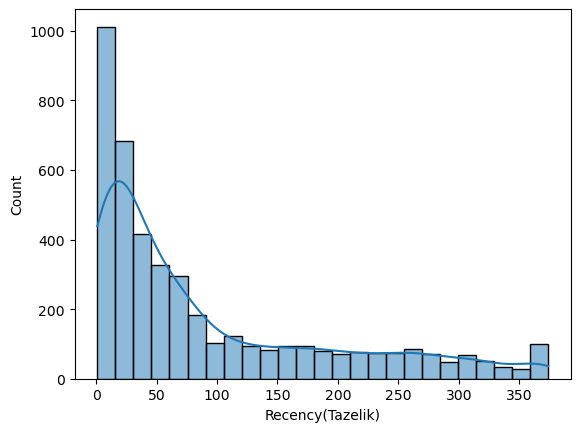

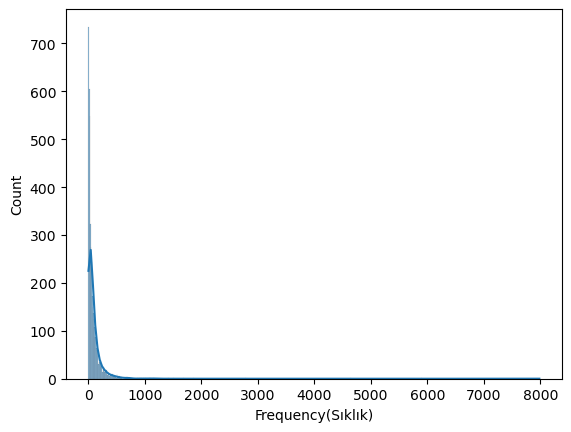

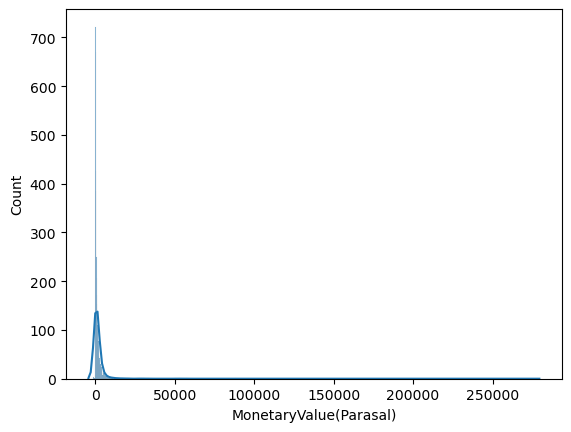

In [40]:
# Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

# Recency dağılımı
sns.histplot(rfm['Recency(Tazelik)'], kde=True)
plt.show()

# Frequency dağılımı
sns.histplot(rfm['Frequency(Sıklık)'], kde=True)
plt.show()

# MonetaryValue dağılımı
sns.histplot(rfm['MonetaryValue(Parasal)'], kde=True)
plt.show()

In [ ]:
# Sütun adlarını değiştirme
rfm.columns = ['Recency(Tazelik)', 'Frequency(Sıklık)', 'MonetaryValue(Parasal)']

# RFM skorlarını hesaplama
# sütunları 5 eşit büyüklükte bölüme ayırma
rfm['R_Score'] = pd.qcut(rfm['Recency(Tazelik)'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency(Sıklık)'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue(Parasal)'], 5, labels=[1, 2, 3, 4, 5])

In [28]:
rfm

,Recency(Tazelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,5,1,1


In [29]:
# RFM skorlarını birleştirme ve RFM Segmentini oluşturma
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R_Score']) + str(x['F_Score']) + str(x['M_Score']), axis=1) # skorları yan yana yazar
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1) # skorları toplar

In [30]:
rfm

,Recency(Tazelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,5,5,5,5.05.05.0,15
12348.0,75,31,1797.24,2,3,4,2.03.04.0,9
12349.0,19,73,1757.55,4,4,4,4.04.04.0,12
12350.0,310,17,334.40,1,2,2,1.02.02.0,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3
18282.0,8,13,176.60,5,1,1,5.01.01.0,7


In [31]:
# RFM skorlarına göre müşteri segmentlerini tanımlama
segt_map = {
    r'[1-2][1-2]': 'Uyuyanlar',              # Hibernating
    r'[1-2][3-4]': 'Risk Altında',           # At Risk
    r'[1-2]5': 'Kaybedemeyiz',               # Can’t Lose
    r'3[1-2]': 'Uykuya Dalma Noktasında',    # About To Sleep
    r'33': 'Dikkat Gerektirenler',           # Need Attention
    r'[3-4][4-5]': 'Sadık Müşteriler',       # Loyal Customers
    r'41': 'Umut Verenler',                  # Promising
    r'51': 'Yeni Müşteriler',                # New Customers
    r'[4-5][2-3]': 'Potansiyel Sadıklar',    # Potential Loyalists
    r'5[4-5]': 'Şampiyonlar'                 # Champions
}
rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [32]:
rfm

,Recency(Tazelik),Frequency(Sıklık),MonetaryValue(Parasal),R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Uyuyanlar
12347.0,2,182,4310.00,5,5,5,5.05.05.0,15,Şampiyonlar
12348.0,75,31,1797.24,2,3,4,2.03.04.0,9,Risk Altında
12349.0,19,73,1757.55,4,4,4,4.04.04.0,12,Sadık Müşteriler
12350.0,310,17,334.40,1,2,2,1.02.02.0,5,Uyuyanlar
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Uyuyanlar
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Uyuyanlar
18282.0,8,13,176.60,5,1,1,5.01.01.0,7,Yeni Müşteriler


In [33]:
# Müşteri sınıflarındaki sayılar
rfm['Segment'].value_counts()

Segment
Uyuyanlar                  1070
Sadık Müşteriler            839
Şampiyonlar                 604
Risk Altında                583
Potansiyel Sadıklar         504
Uykuya Dalma Noktasında     321
Dikkat Gerektirenler        202
Umut Verenler               107
Kaybedemeyiz                 82
Yeni Müşteriler              60
Name: count, dtype: int64

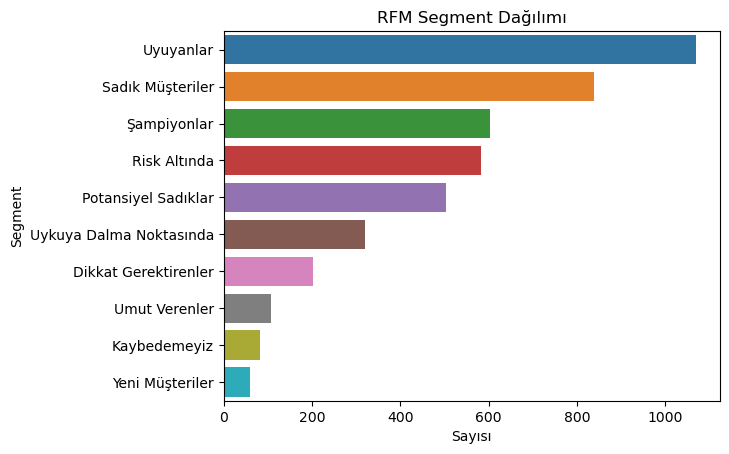

In [35]:
# Segment sayılarını görselleştirme
sns.countplot(y='Segment', data=rfm, order = rfm['Segment'].value_counts().index)
plt.title('RFM Segment Dağılımı')
plt.xlabel('Sayısı')
plt.ylabel('Segment')
plt.show()

# V. Pratik Uygulamalar <a class="anchor" id="pratik-uygulamalar"></a>


## İş Kararlarına Etkisi

RFM (Recency, Frequency, Monetary) analizi, müşteri ilişkileri yönetimi ve pazarlama stratejileri için güçlü bir araçtır. İşletmeler, RFM analizini kullanarak müşteri tabanlarını daha iyi anlayabilir ve daha etkili kararlar alabilirler.

### Stok Yönetimi

RFM analizi, müşterilerin satın alma sıklığını ve en son satın alma zamanını göz önünde bulundurarak stok seviyelerini optimize etmek için kullanılabilir. Örneğin:

- **Yüksek Frekans ve Düşük Recency**: Bu müşteriler için popüler ürünlerin stok seviyeleri yüksek tutulmalıdır.
- **Düşük Frekans ve Yüksek Recency**: Nadiren satın alan müşteriler için stok seviyeleri düşük tutularak maliyetler azaltılabilir.

### Fiyatlandırma Stratejileri

Müşterilerin parasal değerine göre dinamik fiyatlandırma stratejileri geliştirilebilir:

- **Yüksek Monetary Değer**: Premium müşterilere özel fiyatlandırma ve indirimler sunulabilir.
- **Düşük Monetary Değer**: Bu müşterileri daha fazla satın alma yapmaya teşvik etmek için promosyonlar düzenlenebilir.

### Müşteri Hizmetleri

RFM segmentasyonu, müşteri hizmetleri kaynaklarının daha etkin kullanılmasını sağlar:

- **Yüksek Frekans ve Monetary Değer**: VIP müşteri hizmetleri bu grup için öncelikli olabilir.
- **Düşük Frekans ve Recency**: Otomatik hizmetler veya self-servis seçenekleri bu grup için daha uygun olabilir.

## Müşteri Yaşam Döngüsü Yönetimi ve Müşteri Sadakati Programları

RFM analizi, müşteri yaşam döngüsünün çeşitli aşamalarında müşterilere nasıl yaklaşılacağını belirlemede yardımcı olur:

- **Yeni Müşteriler (High Recency)**: Hoş geldiniz teklifleri ve ilk satın alma indirimleri sunulabilir.
- **Sadık Müşteriler (High Frequency, High Monetary)**: Sadakat programları ve özel tekliflerle bu müşteriler ödüllendirilebilir.
- **Uykuda Olan Müşteriler (Low Frequency)**: Yeniden etkinleştirme kampanyaları ile bu müşteriler geri kazanılabilir.

## Endüstri Başarı Hikayeleri

RFM analizinin başarıyla uygulandığı birkaç örnek:

- **Perakende**: Bir perakende zinciri, RFM analizini kullanarak müşteri satın alma davranışlarını anladı ve hedeflenmiş pazarlama kampanyaları ile satışlarını %20 artırdı.
- **E-Ticaret**: Bir e-ticaret platformu, RFM modelini kullanarak müşteri segmentasyonu yaptı ve en değerli müşterilere özel teklifler sunarak müşteri sadakatini artırdı.
- **Finansal Hizmetler**: Bir banka, RFM analizini kullanarak müşteri etkileşimlerini iyileştirdi ve çapraz satış oranlarını %15 yükseltti.
